In [11]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

In [12]:
print(tf.__version__)

1.14.0


In [24]:

#https://keras.io/api/applications/densenet/

model = tf.keras.applications.DenseNet121(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1,
)


In [14]:
print(model.summary())

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [15]:
import pandas as pd
#each set has 325 images, for a total of 650
set_a = pd.read_csv(r"C:\Users\Hari\Desktop\Aravind Eye\_dev\ORIGA\origa_seta.csv")
set_b = pd.read_csv(r"C:\Users\Hari\Desktop\Aravind Eye\_dev\ORIGA\origa_setb.csv")
df = pd.concat([set_a,set_b])
df = df.sample(frac=1) #shuffles the data as to not train on a series of 1s and 0s
diag_dict = {}
for index, row in df.iterrows():
    diag_dict[int(row["File Name"][5:8])] = (1.0 if row["Diagnosis (1 or 0)"] else 0.0)

In [16]:
count = 0
x_val_ind = []
x_train_ind = []
for index, row in df.iterrows():
    #if diag_dict[int(row["File Name"][5:8])] == 1.0:
    #    count+=1
    count+=1
    if count > len(df) - 150 and count < len(df)-50: #this pulls 100 datapoints of about 50% positive and negative
        x_val_ind.append(int(row["File Name"][5:8]))
    else:
        x_train_ind.append(int(row["File Name"][5:8]))

In [17]:
x_train = []
y_train = []
x_val = []
y_val = []
image_folder = "C:\\Users\\Hari\\Desktop\\Aravind Eye\\_dev\\ORIGA\\train_img"
IMG_SIZE = 224
for ind in x_train_ind:
    img_str = str(ind)+".jpg"
    if(ind>=10 and ind<100):
        img_str = "\\0"+img_str
    elif(ind<10):
        img_str = "\\00"+img_str
    else:
        img_str = "\\" +img_str
    image_dir = image_folder+img_str
    img_array = cv2.imread(image_dir)
    crop_array = cv2.resize(img_array[:,536:2536], (IMG_SIZE, IMG_SIZE))
    x_train.append(crop_array/255)
    y_train.append(diag_dict[ind])

for ind in x_val_ind:
    img_str = str(ind)+".jpg"
    if(ind>=10 and ind<100):
        img_str = "\\0"+img_str
    elif(ind<10):
        img_str = "\\00"+img_str
    else:
        img_str = "\\" +img_str
    image_dir = image_folder+img_str
    img_array = cv2.imread(image_dir)
    crop_array = cv2.resize(img_array[:,536:2536], (IMG_SIZE,IMG_SIZE))
    x_val.append(crop_array/255)
    y_val.append(diag_dict[ind])

In [18]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(486, 224, 224, 3)
(486,)
(99, 224, 224, 3)
(99,)


In [25]:
opt = tf.keras.optimizers.Adam(learning_rate=.000001, decay = 1e-6)
from tensorflow.keras.optimizers import SGD
#opt = SGD(lr=0.01)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt, metrics = ['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, mode='auto')

model.fit(x_train, y_train, batch_size=16, epochs=500, verbose=1, validation_data=(x_val,y_val), callbacks = [early_stopping]) #callbacks = [early_stopping]

Train on 486 samples, validate on 99 samples
Epoch 1/500
486/486 [==============================] - 34s 69ms/sample - loss: nan - acc: 0.7222 - val_loss: nan - val_acc: 0.6667
Epoch 2/500
486/486 [==============================] - 7s 15ms/sample - loss: nan - acc: 0.7222 - val_loss: nan - val_acc: 0.6667
Epoch 3/500
486/486 [==============================] - 7s 15ms/sample - loss: nan - acc: 0.7222 - val_loss: nan - val_acc: 0.6667
Epoch 4/500
486/486 [==============================] - 8s 16ms/sample - loss: nan - acc: 0.7222 - val_loss: nan - val_acc: 0.6667


In [36]:
model.save("my_model.h5")

In [37]:
model = tf.keras.models.load_model("my_model")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [33]:
for x in range(10):
    print(y_val[x])

0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0


In [38]:
preds = model.predict(x_val)

In [39]:
print(preds[:10])

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [93]:
c=0
for x in y_val:
    if x == 1.0:
        c+=1
print(c)

44


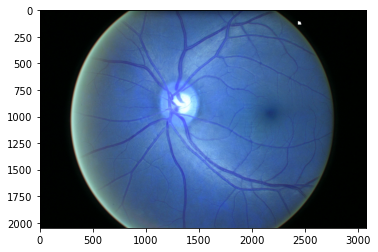

In [44]:
#https://www.youtube.com/watch?v=j-3vuBynnOE&ab_channel=sentdex
img_array = cv2.imread(image_dir)
img_array.res
plt.imshow(img_array)
plt.show()

In [54]:
print(img_array.shape)

(2048, 3072, 3)


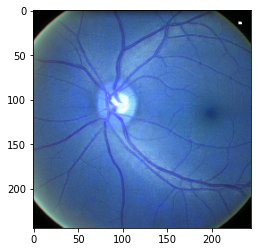

In [57]:
new_array = cv2.resize(img_array[:,536:2536], (244,244))
plt.imshow(new_array)
plt.show()

In [65]:
new_array = new_array/255

In [66]:
print(new_array)

[[[0.         0.00784314 0.        ]
  [0.         0.00784314 0.        ]
  [0.         0.00784314 0.        ]
  ...
  [0.         0.00784314 0.        ]
  [0.         0.00784314 0.        ]
  [0.         0.01176471 0.00392157]]

 [[0.         0.01176471 0.00392157]
  [0.         0.00784314 0.        ]
  [0.         0.01176471 0.00392157]
  ...
  [0.         0.01176471 0.00392157]
  [0.         0.00784314 0.        ]
  [0.00392157 0.01568627 0.00784314]]

 [[0.         0.00784314 0.        ]
  [0.         0.00784314 0.        ]
  [0.         0.01176471 0.00392157]
  ...
  [0.         0.00784314 0.        ]
  [0.         0.01176471 0.00392157]
  [0.         0.01176471 0.00392157]]

 ...

 [[0.         0.00392157 0.00392157]
  [0.         0.01176471 0.00392157]
  [0.         0.01176471 0.00392157]
  ...
  [0.         0.00784314 0.00784314]
  [0.         0.00392157 0.00392157]
  [0.         0.01176471 0.00392157]]

 [[0.         0.01176471 0.00392157]
  [0.         0.00784314 0.        ]


In [42]:
#this cell will be used to protype the process for pre-processing an image given an image number
'''
conditions to be satisfied:
must be 244*244*3 -- might change this later if training time takes forever
must be centered
'''
from PIL import Image

# https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays
num = 15
image_folder = "C:\\Users\\Hari\\Desktop\\Aravind Eye\\_dev\\ORIGA\\train_img"
img_str = str(num)+".jpg"
if(num>=10 and num<100):
    img_str = "\\0"+img_str
elif(num<10):
    img_str = "\\00"+img_str
else:
    img_str = "\\" +img_str
image_dir = image_folder+img_str

